In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [22]:
wine=pd.read_csv("winequality-red.csv")

In [23]:
wine.head()

,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [24]:
wine.columns

Index(['fixedacidity', 'volatileacidity', 'citricacid', 'residualsugar',
       'chlorides', 'freesulfurdioxide', 'totalsulfurdioxide', 'density', 'pH',
       'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [25]:
wine.dtypes

fixedacidity          float64
volatileacidity       float64
citricacid            float64
residualsugar         float64
chlorides             float64
freesulfurdioxide     float64
totalsulfurdioxide    float64
density               float64
pH                    float64
sulphates             float64
alcohol               float64
quality                 int64
dtype: object

In [26]:
wine.describe()

,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [27]:
wine.corr()

,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality
fixedacidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatileacidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citricacid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residualsugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
freesulfurdioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
totalsulfurdioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [28]:
wine.cov()

,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality
fixedacidity,3.031416,-0.079851,0.227820,0.281756,0.007679,-2.800921,-6.482346,0.002195,-0.183586,0.054010,-0.114421,0.174424
volatileacidity,-0.079851,0.032062,-0.019272,0.000484,0.000517,-0.019674,0.450426,0.000007,0.006495,-0.007921,-0.038600,-0.056476
citricacid,0.227820,-0.019272,0.037947,0.039434,0.001869,-0.124252,0.227697,0.000134,-0.016298,0.010328,0.022815,0.035612
residualsugar,0.281756,0.000484,0.039434,1.987897,0.003690,2.758611,9.416441,0.000945,-0.018644,0.001321,0.063219,0.015635
chlorides,0.007679,0.000517,0.001869,0.003690,0.002215,0.002738,0.073387,0.000018,-0.001926,0.002962,-0.011092,-0.004900
freesulfurdioxide,-2.800921,-0.019674,-0.124252,2.758611,0.002738,109.414884,229.737521,-0.000433,0.113653,0.091592,-0.773698,-0.427907
totalsulfurdioxide,-6.482346,0.450426,0.227697,9.416441,0.073387,229.737521,1082.102373,0.004425,-0.337699,0.239471,-7.209298,-4.917237
density,0.002195,0.000007,0.000134,0.000945,0.000018,-0.000433,0.004425,0.000004,-0.000100,0.000048,-0.000998,-0.000267
pH,-0.183586,0.006495,-0.016298,-0.018644,-0.001926,0.113653,-0.337699,-0.000100,0.023835,-0.005146,0.033832,-0.007198
sulphates,0.054010,-0.007921,0.010328,0.001321,0.002962,0.091592,0.239471,0.000048,-0.005146,0.028733,0.016907,0.034413


<Axes: >

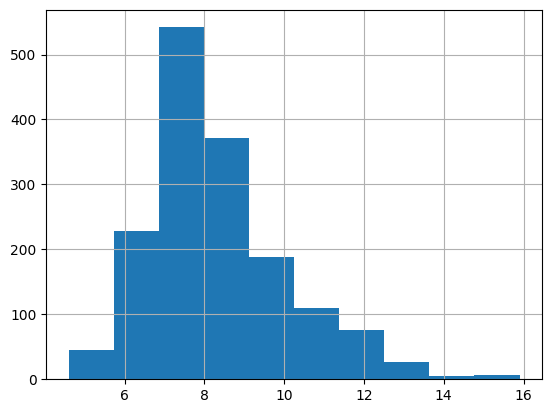

In [32]:
wine["fixedacidity"].hist(bins=10)

<Axes: >

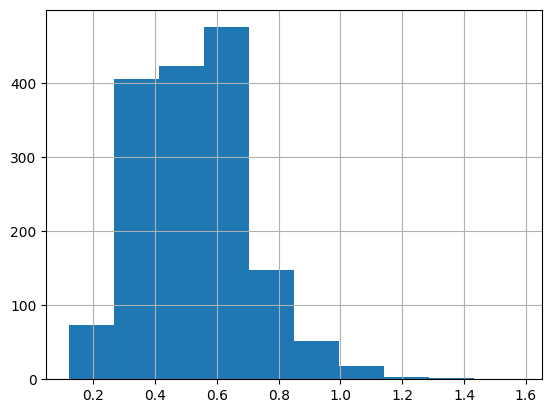

In [34]:
wine['volatileacidity'].hist(bins=10)

# DATA MAPPING

In [35]:
sorted(wine["quality"].unique())


[3, 4, 5, 6, 7, 8]

In [36]:
wine['quality']=wine['quality'].map({3 : 'bad', 4 : 'bad', 5 :'bad', 6 :'good', 7 :'good', 8 :'good'})

In [37]:
wine.quality.value_counts()

quality
good    855
bad     744
Name: count, dtype: int64

In [38]:
data=wine.loc[:,"fixedacidity":"pH"]
target=wine.loc[:,"quality"]

In [39]:
data.head()

,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51


In [40]:
target.head()

0     bad
1     bad
2     bad
3    good
4     bad
Name: quality, dtype: object

In [70]:
target=target.map({"bad":0,"good":1})

In [71]:
wine['quality']=target

In [74]:
wine.head()

,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [75]:
wine.head()

,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [76]:
minmax=preprocessing.MinMaxScaler(feature_range=(0,1))
minmax.fit_transform(data)

array([[0.24778761, 0.39726027, 0.        , ..., 0.09893993, 0.56754772,
        0.60629921],
       [0.28318584, 0.52054795, 0.        , ..., 0.2155477 , 0.49412628,
        0.36220472],
       [0.28318584, 0.43835616, 0.04      , ..., 0.16961131, 0.50881057,
        0.40944882],
       ...,
       [0.15044248, 0.26712329, 0.13      , ..., 0.12014134, 0.41629956,
        0.53543307],
       [0.11504425, 0.35958904, 0.12      , ..., 0.13427562, 0.39647577,
        0.65354331],
       [0.12389381, 0.13013699, 0.47      , ..., 0.12720848, 0.3979442 ,
        0.51181102]])

# Splitting the dataset into Training set and Test set


In [77]:
from sklearn import model_selection, neighbors
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data,target,test_size=0.2)

In [78]:
x_train.head()

,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH
22,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33
9,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35
710,10.6,1.025,0.43,2.80,0.080,21.0,84.0,0.99850,3.06
840,11.1,0.420,0.47,2.65,0.085,9.0,34.0,0.99736,3.24


In [79]:
y_train.head()

22     0
40     0
9      0
710    0
840    1
Name: quality, dtype: int64

In [80]:
x_test.head()

,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH
1157,5.1,0.510,0.18,2.1,0.042,16.0,101.0,0.99240,3.46
108,8.0,0.330,0.53,2.5,0.091,18.0,80.0,0.99760,3.37
537,8.1,0.825,0.24,2.1,0.084,5.0,13.0,0.99720,3.37
1123,10.7,0.400,0.37,1.9,0.081,17.0,29.0,0.99674,3.12
903,6.8,0.590,0.06,6.0,0.060,11.0,18.0,0.99620,3.41


In [81]:
y_test

1157    1
108     1
537     1
1123    1
903     1
       ..
1534    1
336     1
413     1
773     1
744     0
Name: quality, Length: 320, dtype: int64

# #KNN CLASSIFIER


In [82]:
clf = neighbors.KNeighborsClassifier()
clf.fit(x_train,y_train)

KNeighborsClassifier()

In [83]:
y_pred=clf.predict(x_test)

In [84]:
y_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,

In [85]:
print(f"Actual Quality of wine \n: {y_test.values}")


Actual Quality of wine 
: [1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 1 1
 1 0 0 1 0 0 1 0 1 1 1 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 1 1 0 1 1 0 1 1 0 0
 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 0
 0 0 1 0 1 1 1 1 1 0 1 0 0 1 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0
 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 1 0 0 1 1
 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0
 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1
 1 0 1 1 1 1 0 1 0 0 0 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 0 1 0 1 0 0
 0 1 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 1 0 1 1 1 1 0]


In [86]:
print("Predicted Quality of wine : ")
print(y_pred)

Predicted Quality of wine : 
[0 0 0 1 1 0 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 0 0 0 0
 1 1 0 0 1 1 1 0 0 0 1 1 1 1 0 1 0 0 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0
 1 0 0 0 1 1 0 0 1 1 0 0 1 0 0 1 0 1 1 1 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 1 0
 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 0 1 0
 0 1 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0
 1 0 0 0 0 0 1 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0 1
 0 0 1 0 1 1 0 0 0 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 1
 1 0 1 1 1 0 0 1 0 1 1 0 1 0 0 0 1 1 1 1 1 1 1 0]


In [89]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix
print("KNN CLASSIFIER")
print(f"Accuracy score: {(accuracy_score(y_test,y_pred) * 100)}")
print(f"Recall score : {(recall_score(y_test, y_pred) * 100)}")
print(f"ROC score :  {(roc_auc_score(y_test, y_pred) * 100)}")
print(confusion_matrix(y_test, y_pred)) 

KNN CLASSIFIER
Accuracy score: 62.5
Recall score : 67.26190476190477
ROC score :  62.24937343358397
[[ 87  65]
 [ 55 113]]


In [90]:
probas = clf.predict_proba(x_test)

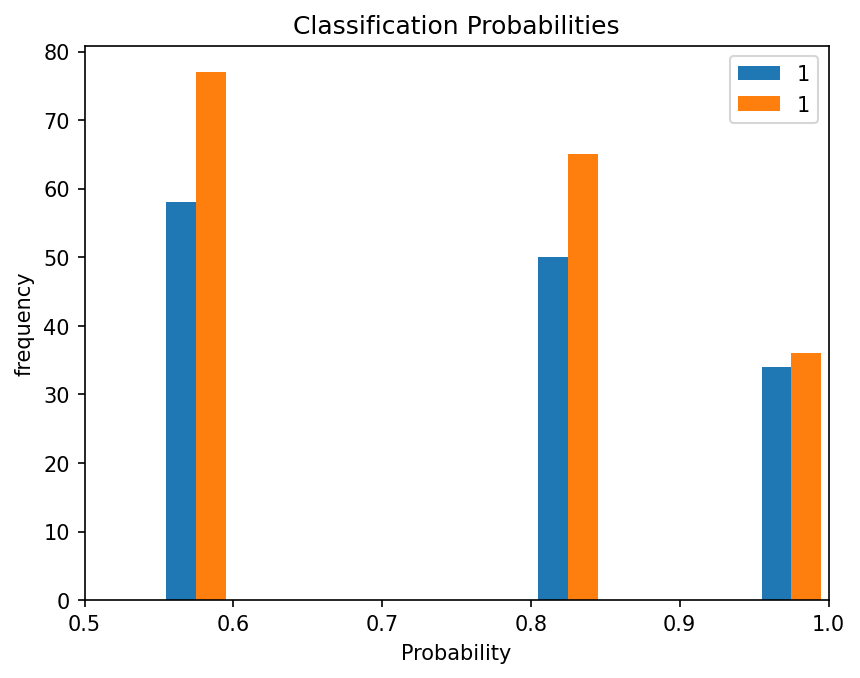

In [91]:
import matplotlib.pyplot as plt
plt.figure(dpi=150)
plt.hist(probas, bins=20)
plt.title('Classification Probabilities')
plt.xlabel('Probability')
plt.ylabel('frequency')
plt.xlim([0.5, 1.0])
plt.legend(y_test)
plt.show()

In [92]:
x_train_std = minmax.fit_transform(x_train)
x_test_std = minmax.transform(x_test)

In [93]:
from sklearn.model_selection import cross_val_score,cross_val_predict

In [94]:
clf_acc = cross_val_score(clf, x_train_std, y_train, cv=3, scoring="accuracy",  n_jobs=-1)

In [95]:
clf_proba = cross_val_predict(clf, x_train_std, y_train, cv=3, method='predict_proba')
clf_scores = clf_proba[:, 1]

In [96]:
clf_acc

array([0.67915691, 0.69483568, 0.67370892])

In [97]:
from sklearn.metrics import roc_auc_score,roc_curve
def ROC_curve(title, y_train, scores, label=None):
    fpr, tpr, thresholds = roc_curve(y_train, scores)
    print('AUC Score ({}): {:.2f} '.format(title, roc_auc_score(y_train, scores)))
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, linewidth=2, label=label, color='b')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC Curve: {}'.format(title), fontsize=16)
    plt.show()

AUC Score (kNN): 0.73 


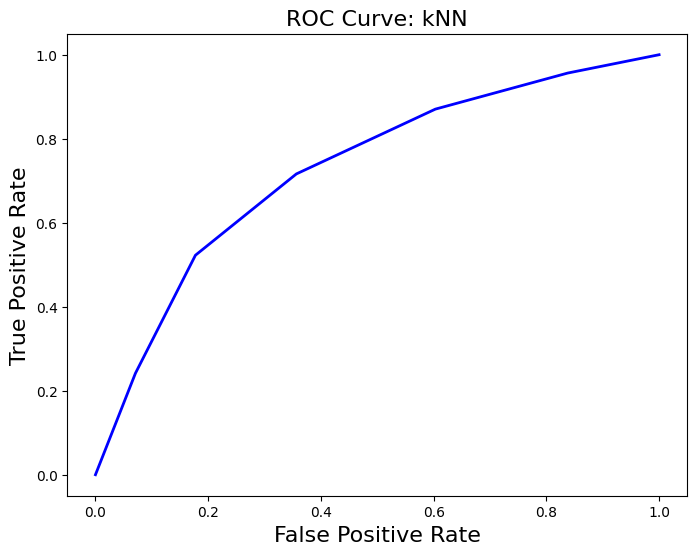

In [98]:
ROC_curve('kNN', y_train, clf_scores)

# LOGISTIC REGRESSION


In [101]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr_acc = cross_val_score(lr, x_train_std, y_train, cv=3, scoring='accuracy', n_jobs=-1)
lr_proba = cross_val_predict(lr, x_train_std, y_train, cv=3, method='predict_proba')
lr_scores = lr_proba[:, 1]

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [102]:
lr_acc

array([0.69086651, 0.68779343, 0.70892019])

In [103]:
y_pred=lr.predict(x_test)

In [104]:
print("Actual Quality : ")
print(y_test.values)

Actual Quality : 
[1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 1 1
 1 0 0 1 0 0 1 0 1 1 1 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 1 1 0 1 1 0 1 1 0 0
 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 0
 0 0 1 0 1 1 1 1 1 0 1 0 0 1 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0
 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 1 0 0 1 1
 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0
 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1
 1 0 1 1 1 1 0 1 0 0 0 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 0 1 0 1 0 0
 0 1 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 1 0 1 1 1 1 0]


In [105]:
print("\nPredicted Quality : ")
print(y_pred)


Predicted Quality : 
[0 1 0 1 1 1 1 1 0 1 0 1 0 1 1 0 0 1 0 1 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1
 1 0 0 0 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1 1 1 1 1 0 0
 1 0 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0
 0 0 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 0 1 1 1 0 1 1 1 0 1 1 0 0 0 1 0 1 1
 1 1 1 1 0 0 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 1
 0 0 0 1 0 1 0 1 1 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 0 0 0 1 0 1 0 1 1 1 1 0 0
 1 1 0 1 1 0 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 0 0
 1 0 1 1 1 1 0 1 0 0 0 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1
 0 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 0]


In [106]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix
print("LOGISTIC REGRESSION")
print("\nAccuracy score: %f" %(accuracy_score(y_test,y_pred) * 100))
print("Recall score : %f" %(recall_score(y_test, y_pred) * 100))
print("ROC score : %f\n" %(roc_auc_score(y_test, y_pred) * 100))
print(confusion_matrix(y_test, y_pred))

LOGISTIC REGRESSION

Accuracy score: 65.625000
Recall score : 73.214286
ROC score : 65.225564

[[ 87  65]
 [ 45 123]]


In [107]:
from sklearn.metrics import roc_auc_score,roc_curve
def ROC_curve(title, y_train, scores, label=None):
    fpr, tpr, thresholds = roc_curve(y_train, scores)
    print('AUC Score ({}): {:.2f} '.format(title, roc_auc_score(y_train, scores)))
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, linewidth=2, label=label, color='b')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC Curve: {}'.format(title), fontsize=16)
    plt.show()

AUC Score (Logistic Regression): 0.76 


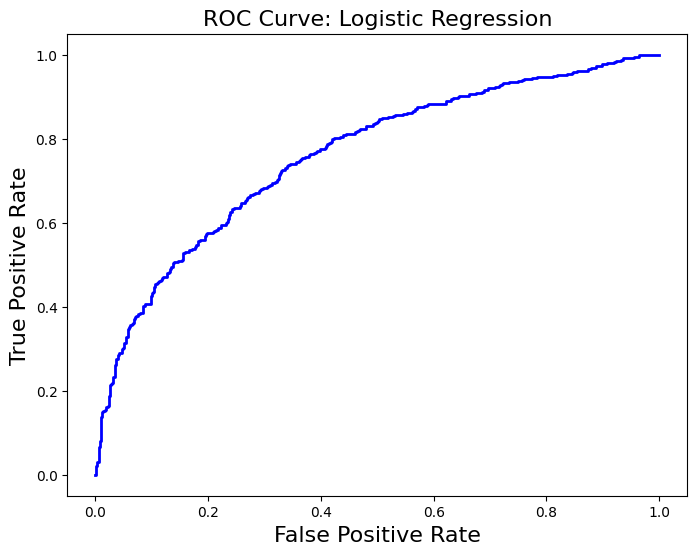

In [108]:
ROC_curve('Logistic Regression', y_train, lr_scores)

# Support Vector Classification


In [119]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf',probability = True)
svc_classifier = svc.fit(x_train,y_train)

In [120]:
svc_acc = cross_val_score(svc_classifier, x_train_std, y_train, cv=3, scoring="accuracy",  n_jobs=-1)
svc_proba = cross_val_predict(svc_classifier, x_train_std, y_train, cv=3, method='predict_proba')
svc_scores = svc_proba[:, 1]

In [121]:
y_pred=svc_classifier.predict(x_test)

In [122]:
print("Actual Quality: ")
print(y_test.values)

Actual Quality: 
[1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 1 1
 1 0 0 1 0 0 1 0 1 1 1 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 1 1 0 1 1 0 1 1 0 0
 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 0
 0 0 1 0 1 1 1 1 1 0 1 0 0 1 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0
 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 1 0 0 1 1
 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0
 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1
 1 0 1 1 1 1 0 1 0 0 0 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 0 1 0 1 0 0
 0 1 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 1 0 1 1 1 1 0]


In [123]:
print("\nPredicted quality : ")
print(y_pred)


Predicted quality : 
[0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 0 0 0 1 1
 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0
 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0
 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1
 1 1 0 1 0 0 0 1 1 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 0 0 1 1 1
 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1
 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1
 1 0 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 0 0]


In [124]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix
print("SUPPORT VECTOR CLASSIFICATION")
print(f"Accuracy score: {(accuracy_score(y_test,y_pred) * 100)}")
print(f"Recall score : {(recall_score(y_test, y_pred) * 100)}")
print(f"ROC score :  {(roc_auc_score(y_test, y_pred) * 100)}")
print(confusion_matrix(y_test, y_pred)) 

SUPPORT VECTOR CLASSIFICATION
Accuracy score: 63.74999999999999
Recall score : 83.92857142857143
ROC score :  62.68796992481204
[[ 63  89]
 [ 27 141]]


In [125]:
from sklearn.metrics import roc_auc_score,roc_curve
def ROC_curve(title, y_train, scores, label=None):
    fpr, tpr, thresholds = roc_curve(y_train, scores)
    print('AUC Score ({}): {:.2f} '.format(title, roc_auc_score(y_train, scores)))
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, linewidth=2, label=label, color='b')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC Curve: {}'.format(title), fontsize=16)
    plt.show()

AUC Score (Support Vector Classification): 0.78 


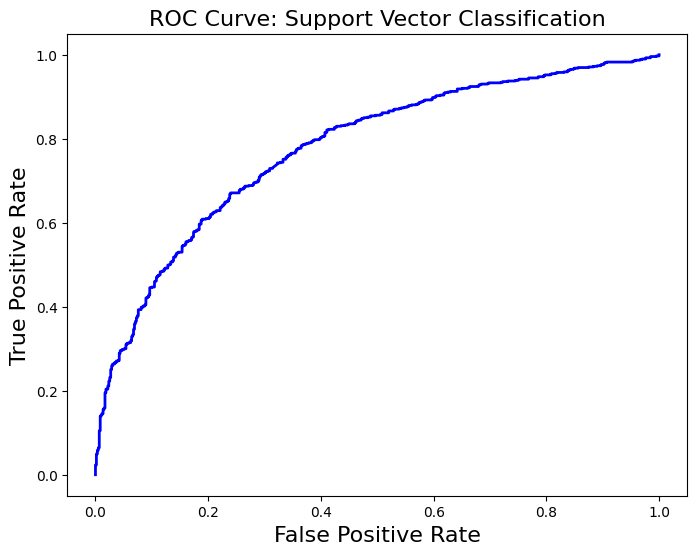

In [126]:
ROC_curve('Support Vector Classification',y_train,svc_scores)

# #DESCISION TREE


In [127]:
from sklearn.tree import DecisionTreeClassifier
dtc_clf = DecisionTreeClassifier()
dtc_clf.fit(x_train,y_train)
dtc_clf_acc = cross_val_score(dtc_clf, x_train_std, y_train, cv=3, scoring="accuracy",  n_jobs=-1)
dtc_proba = cross_val_predict(dtc_clf, x_train_std, y_train, cv=3, method='predict_proba')
dtc_clf_scores = dtc_proba[:, 1]

In [128]:
y_pred=dtc_clf.predict(x_test)

In [129]:
dtc_clf_scores

array([0., 0., 0., ..., 1., 1., 1.])

In [130]:
dtc_clf_acc

array([0.69789227, 0.69483568, 0.6713615 ])

In [131]:
print("Actual Quality: ")
print(y_test.values)

Actual Quality: 
[1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 1 1
 1 0 0 1 0 0 1 0 1 1 1 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 1 1 0 1 1 0 1 1 0 0
 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 0
 0 0 1 0 1 1 1 1 1 0 1 0 0 1 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0
 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 1 0 0 1 1
 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0
 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1
 1 0 1 1 1 1 0 1 0 0 0 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 0 1 0 1 0 0
 0 1 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 1 0 1 1 1 1 0]


In [132]:
print("\nPredicted Quality : ")
print(y_pred)


Predicted Quality : 
[1 0 1 1 1 0 1 0 1 0 0 1 1 1 0 0 0 1 0 0 1 1 1 1 1 1 0 1 1 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 1 0 0 0 1 1 0 1 0 1 1 0 1 0 0 1 1 1 0 0 0 1 1 0 1 1 1 1 1 0 0
 1 1 0 1 1 0 1 0 0 1 1 1 1 0 1 1 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 0
 0 0 0 0 1 1 1 0 0 1 1 1 0 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 1
 0 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1
 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 1 0
 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 0 0 0 1 0 1 1 1 1 0 0 0 1 0 1 0 0 1 1 1
 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 1 0 1 0 1 1 1 1 0 1 0 0 0 1 1 0 1 1 0 1 0]


In [133]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix
print("DESCISION TREE")
print(f"Accuracy score: {(accuracy_score(y_test,y_pred) * 100)}")
print(f"Recall score : {(recall_score(y_test, y_pred) * 100)}")
print(f"ROC score :  {(roc_auc_score(y_test, y_pred) * 100)}")
print(confusion_matrix(y_test, y_pred)) 

DESCISION TREE
Accuracy score: 70.625
Recall score : 72.02380952380952
ROC score :  70.5513784461153
[[105  47]
 [ 47 121]]


In [134]:
from sklearn.metrics import roc_auc_score,roc_curve
def ROC_curve(title, y_train, scores, label=None):
    fpr, tpr, thresholds = roc_curve(y_train, scores)
    print('AUC Score ({}): {:.2f} '.format(title, roc_auc_score(y_train, scores)))
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, linewidth=2, label=label, color='b')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC Curve: {}'.format(title), fontsize=16)
    plt.show()

AUC Score (Decision Tree Classifier): 0.68 


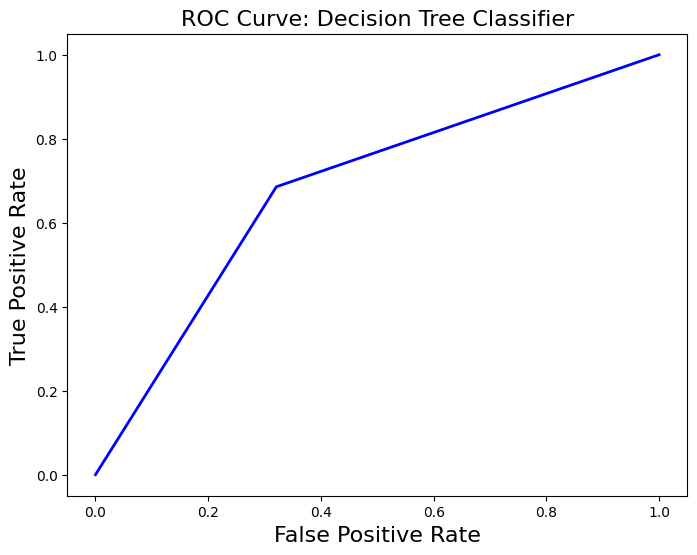

In [135]:
ROC_curve('Decision Tree Classifier',y_train,dtc_clf_scores)

# #RANDOM FOREST


In [136]:
from sklearn.ensemble import RandomForestClassifier
rmf = RandomForestClassifier(max_depth=3, random_state=0)
rmf_clf = rmf.fit(x_train, y_train)

In [137]:
rmf_clf_acc = cross_val_score(rmf_clf, x_train_std, y_train, cv=3, scoring="accuracy",  n_jobs=-1)
rmf_proba = cross_val_predict(rmf_clf, x_train_std, y_train, cv=3, method='predict_proba')
rmf_clf_scores = rmf_proba[:, 1]

In [138]:
rmf_clf_acc

array([0.68852459, 0.71596244, 0.70657277])

In [139]:
y_pred=lr.predict(x_test)

In [140]:
print("Actual Quality : ")
print(y_test.values)

Actual Quality : 
[1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 1 1
 1 0 0 1 0 0 1 0 1 1 1 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 1 1 0 1 1 0 1 1 0 0
 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 0
 0 0 1 0 1 1 1 1 1 0 1 0 0 1 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0
 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 1 0 0 1 1
 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0
 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1
 1 0 1 1 1 1 0 1 0 0 0 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 0 1 0 1 0 0
 0 1 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 1 0 1 1 1 1 0]


In [141]:
print("Predicted Quality : ")
print(y_pred)

Predicted Quality : 
[0 1 0 1 1 1 1 1 0 1 0 1 0 1 1 0 0 1 0 1 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1
 1 0 0 0 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1 1 1 1 1 0 0
 1 0 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0
 0 0 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 0 1 1 1 0 1 1 1 0 1 1 0 0 0 1 0 1 1
 1 1 1 1 0 0 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 1
 0 0 0 1 0 1 0 1 1 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 0 0 0 1 0 1 0 1 1 1 1 0 0
 1 1 0 1 1 0 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 0 0
 1 0 1 1 1 1 0 1 0 0 0 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1
 0 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 0]


In [143]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix
print("RANDOM FOREST")
print(f"Accuracy score: {(accuracy_score(y_test,y_pred) * 100)}")
print(f"Recall score : {(recall_score(y_test, y_pred) * 100)}")
print(f"ROC score :  {(roc_auc_score(y_test, y_pred) * 100)}")
print(confusion_matrix(y_test, y_pred)) 

RANDOM FOREST
Accuracy score: 65.625
Recall score : 73.21428571428571
ROC score :  65.22556390977444
[[ 87  65]
 [ 45 123]]


In [149]:
from sklearn.metrics import roc_auc_score,roc_curve
def ROC_curve(title, y_train, scores, label=None):
    fpr, tpr, thresholds = roc_curve(y_train, scores)
    print(f'AUC Score {title}, {roc_auc_score(y_train, scores)}')
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, linewidth=2, label=label, color='b')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve: {title}')
    plt.show()

AUC Score (Random Forest Classifier): 0.76 


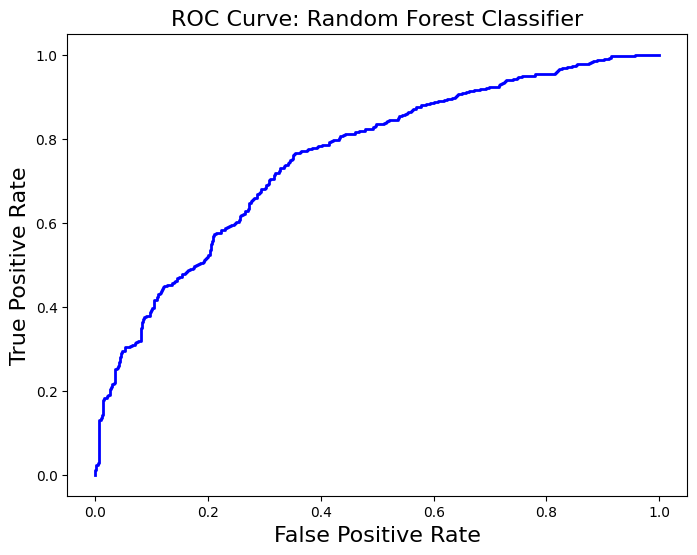

In [145]:
ROC_curve('Random Forest Classifier',y_train,rmf_clf_scores)